In [1]:
from field_util import CartCoord, Field

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

In [15]:
! wget "https://zenodo.org/record/5842842/files/map_2020_v0.bin"
! mkdir data
! mkdir data/CLAMATO
! mv map_2020_v0.bin ./data/CLAMATO/

--2022-12-15 18:05:21--  https://zenodo.org/record/5842842/files/map_2020_v0.bin
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26686464 (25M) [application/octet-stream]
Saving to: ‘map_2020_v0.bin’

map_2020_v0.bin     100%[===================>]  25.45M   158KB/s    in 2m 53s  

2022-12-15 18:08:16 (151 KB/s) - ‘map_2020_v0.bin’ saved [26686464/26686464]



In [2]:
# initialize the coordinate system
cosmo = FlatLambdaCDM(H0=100* u.km / u.s / u.Mpc, Om0=0.315) # h left undermined
mycoord = CartCoord(150.14205192829834, 2.224237689411875, cosmo) #  Cosmic Birth Coordinates

In [3]:
# load CLAMATO
clamato_path = './data/CLAMATO/map_2020_v0.bin'
delta_clm_real = np.fromfile(clamato_path, dtype='double').reshape(68, 56, 876).transpose(2, 0, 1)
delta_clm_real = delta_clm_real[::1,::-1,::1] 

x_0, y_0, z_0 = mycoord.orig_to_box(149.89, 2.07, 2.05)
CLAMATO_field = Field(x_0, y_0-34*u.Mpc, z_0, 0.5*u.Mpc, delta_clm_real)

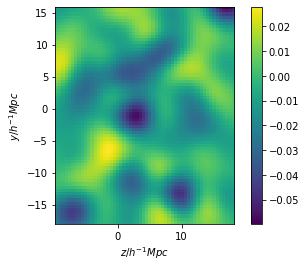

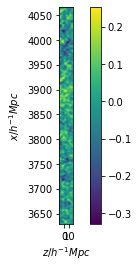

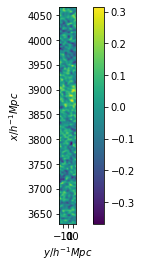

In [4]:
# fast check
CLAMATO_field.plot("CLAMATO", tight_layout = False)

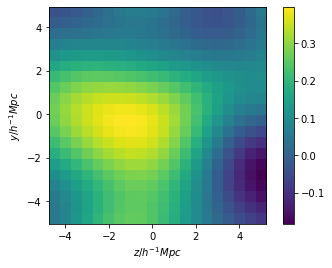

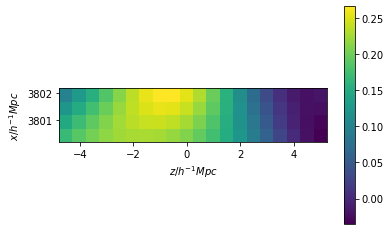

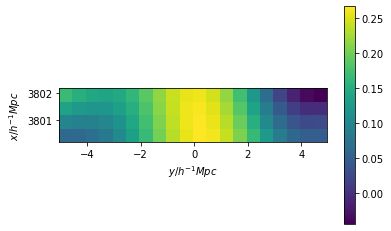

In [9]:
# clip the field, then plot
c_field = CLAMATO_field.clip_with_coord([3800*u.Mpc, -5*u.Mpc, -5*u.Mpc], [3802*u.Mpc, 5*u.Mpc, 5*u.Mpc])
c_field.plot("", tight_layout = False)